# Домашнее задание 3 - PANDAS
## Балакирева Дарья Сергеевна НПМбд-01-19б

## 1. Табличные данные и Pandas

Pandas — удобная библиотека для работы с табличными данными в Python, если данных не слишком много и они помещаются в оперативную память вашего компьютера. Несмотря на неэффективность реализации и некоторые проблемы, библиотека стала стандартом в анализе данных. С этой библиотекой мы сейчас и познакомимся.

Основной объект в pandas это DataFrame, представляющий собой таблицу с именованными колонками различных типов, индексом (может быть многоуровневым). DataFrame можно создавать, считывая таблицу из файла или задавая вручную из других объектов.

В этой части потребуется выполнить несколько небольших заданий. Можно пойти двумя путями: сначала изучить материалы, а потом приступить к заданиям, или же разбираться "по ходу". Выбирайте сами.

Материалы:
1. [Pandas за 10 минут из официального руководства](http://pandas.pydata.org/pandas-docs/stable/10min.html)
2. [Документация](http://pandas.pydata.org/pandas-docs/stable/index.html) (стоит обращаться, если не понятно, как вызывать конкретный метод)
3. [Примеры использования функционала](http://nbviewer.jupyter.org/github/justmarkham/pandas-videos/blob/master/pandas.ipynb)

Многие из заданий можно выполнить несколькими способами. Не существуют единственно верного, но попробуйте максимально задействовать арсенал pandas и ориентируйтесь на простоту и понятность вашего кода. Мы не будем подсказывать, что нужно использовать для решения конкретной задачи, попробуйте находить необходимый функционал сами (название метода чаще всего очевидно). В помощь вам документация, поиск и stackoverflow.

In [1]:
%pylab inline  
# import almost all we need
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


Данные можно скачать [отсюда](https://www.dropbox.com/s/5qq94wzmbw4e54r/data.csv?dl=0).

#### 1. [0.5 баллов] Откройте файл с таблицей (не забудьте про её формат). Выведите последние 10 строк.

Посмотрите на данные и скажите, что они из себя представляют, сколько в таблице строк, какие столбцы?

In [22]:
data_last10 = pd.read_csv('data.csv')
print('Количество строк = ', len(data_last10))
print('Название столбцов :', ', '.join(list(data_last10.columns)))
data_last10.tail(10)

Количество строк =  4622
Название столбцов : order_id, quantity, item_name, choice_description, item_price


,order_id,quantity,item_name,choice_description,item_price
4612,1831,1,Carnitas Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$9.25
4613,1831,1,Chips,NaN,$2.15
4614,1831,1,Bottled Water,NaN,$1.50
4615,1832,1,Chicken Soft Tacos,"[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream]]",$8.75
4616,1832,1,Chips and Guacamole,NaN,$4.45
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75
4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$8.75


#### 2. [0.25 баллов] Ответьте на вопросы:
1. Сколько заказов попало в выборку?
2. Сколько уникальных категорий товара было куплено? (item_name)

In [23]:
print('В выборку попало: ', len(pd.unique(data_last10['order_id'])))
print('Уникальных категорий было куплено : ', len(pd.unique(data_last10['item_name'])))


В выборку попало:  1834
Уникальных категорий было куплено :  50


#### 3. [0.25 баллов] Есть ли в данных пропуски? В каких колонках? 

In [31]:
if data_last10.isna().any().any():
    print("Пропуски в данных : ")
    columns_na = data_last10.isna().any()
    for i in range(len(data_last10.columns)):
        if columns_na[i]: print(data_last10.columns[i], end = ' ')
else:
    print("Нет пропусков")

Пропуски в данных : 
choice_description 

Заполните пропуски пустой строкой для строковых колонок и нулём для числовых.

In [39]:
df = data_last10.copy(deep=True)
columns_na = df.isna().any()
for i in range(len(df.columns)):
        if columns_na[i]: 
            if (df[df.columns[i]].dtype == int64) or (df[df.columns[i]].dtype == float64):
                df[df.columns[i]].fillna(value = 0, inplace = True)
            else:
                df[df.columns[i]].fillna(value = "", inplace = True)
df

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


Проверим

In [40]:
if df.isna().any().any():
    print("Пропуски в данных : ")
    columns_na = df.isna().any()
    for i in range(len(data_last10.columns)):
        if columns_na[i]: print(df.columns[i], end = ' ')
else:
    print("Нет пропусков")

Нет пропусков


#### 4. [0.5 баллов] Посмотрите внимательнее на колонку с ценой товара. Какого она типа? Создайте новую колонку так, чтобы в ней цена была числом.

Для этого попробуйте применить функцию-преобразование к каждой строке вашей таблицы (для этого есть соответствующая функция).

In [41]:
print("Тип колонки c ценой:", df["item_price"].dtype)
price_new = []
for i in df["item_price"]:
    price_new.append(float(i[1:]))
df["price_new"] = price_new
df

Тип колонки c ценой: object


,order_id,quantity,item_name,choice_description,item_price,price_new
0,1,1,Chips and Fresh Tomato Salsa,,$2.39,2.39
1,1,1,Izze,[Clementine],$3.39,3.39
2,1,1,Nantucket Nectar,[Apple],$3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,,$2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98,16.98
...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75,11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75,11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25,11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75,8.75


Проверим

In [42]:
df.dtypes

order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price             object
price_new             float64
dtype: object

Какая средняя/минимальная/максимальная цена у товара? 

In [44]:
#столбец с ценой за 1 товар
df['price_for_one'] = df['price_new'] / df['quantity']
df

,order_id,quantity,item_name,choice_description,item_price,price_new,price_for_one
0,1,1,Chips and Fresh Tomato Salsa,,$2.39,2.39,2.39
1,1,1,Izze,[Clementine],$3.39,3.39,3.39
2,1,1,Nantucket Nectar,[Apple],$3.39,3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,,$2.39,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98,16.98,8.49
...,...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75,11.75,11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75,11.75,11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25,11.25,11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75,8.75,8.75


In [123]:
print('Минимальная цена товара =', df.price_for_one.min())
print('Средняя цена товара =', df.price_for_one.mean())
print('Максимальная цена товара =', df.price_for_one.max())

Минимальная цена товара = 1.09
Средняя цена товара = 7.084424491562234
Максимальная цена товара = 11.89


Удалите старую колонку с ценой.

In [46]:
del df['item_price']
df

,order_id,quantity,item_name,choice_description,price_new,price_for_one
0,1,1,Chips and Fresh Tomato Salsa,,2.39,2.39
1,1,1,Izze,[Clementine],3.39,3.39
2,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,8.49
...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75,11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75,11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25,11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75,8.75


#### 5. [0.25 баллов] Какие 5 товаров были самыми дешёвыми и самыми дорогими? (по item_name)

Для этого будет удобно избавиться от дубликатов и отсортировать товары. Не забудьте про количество товара.

In [125]:
print("5 самых дешёвых товаров: ")
print(*df[df["quantity"] == 1].sort_values(by = "price_for_one").drop_duplicates("item_name").head(5)["item_name"], sep = ", ")
print("5 самых дорогих товаров: ")
print(*df[df["quantity"] == 1].sort_values(by = "price_for_one", 
                                           ascending = False).drop_duplicates("item_name").head(5)["item_name"], sep = ", ")

5 самых дешёвых товаров: 
Canned Soda, Bottled Water, Canned Soft Drink, Side of Chips, Chips
5 самых дорогих товаров: 
Steak Salad Bowl, Barbacoa Salad Bowl, Carnitas Salad Bowl, Steak Burrito, Barbacoa Burrito


#### 6. [0.5 баллов] Сколько раз клиенты покупали больше 1 Chicken Bowl (item_name)?

In [54]:
print('Клиенты покупали больше 1 Chicken Bowl', len(df[(df['item_name'] == 'Chicken Bowl') & (df['quantity'] > 1)]), "раза")

Клиенты покупали больше 1 Chicken Bowl 33 раза


#### 7. [0.5 баллов] Какой средний чек у заказа? Сколько в среднем товаров покупают?

Если необходимо провести вычисления в терминах заказов, то будет удобно сгруппировать строки по заказам и посчитать необходимые статистики.

In [56]:
print("Средний чек заказа: ", df.groupby("order_id")["price_new"].sum().mean())
print("Среднее количество товаров: ", df.groupby("order_id")["quantity"].sum().mean())

Средний чек заказа:  18.81142857142869
Среднее количество товаров:  2.711014176663032


#### 8. [0.25 баллов] Сколько заказов содержали ровно 1 товар?

In [57]:
print('1 товар содержали ',len(df.groupby("order_id").size()[df.groupby("order_id")["quantity"].sum() == 1]), "заказов")

1 товар содержали  56 заказов


#### 9. [0.25 баллов] Какая самая популярная категория товара? 

In [62]:
count_items = df.groupby('item_name')['quantity'].sum()
count_items.sort_values(ascending=False).head(2)
print('Самая популярная категория товара:', *list(dict(count_items.sort_values(ascending=False).head(1)).keys()))

Самая популярная категория товара: Chicken Bowl


#### 10. [0.5 баллов] Какие виды Burrito существуют? Какой из них чаще всего покупают? Какой из них самый дорогой? 

In [64]:
d = df[df["item_name"].str.contains("Burrito")]
print("Виды буррито: ")
print(*d["item_name"].drop_duplicates(), sep = ', ')
print("Чаще всего покупают: ", 
      *d.groupby('item_name')["quantity"].sum().sort_values(ascending = False).head(1).keys())
print("Самый дорогой: ", 
      *d[d["quantity"] == 1].sort_values(by = "price_for_one", 
                                                   ascending = False).drop_duplicates("item_name")["item_name"].head(1))

Виды буррито: 
Steak Burrito, Chicken Burrito, Barbacoa Burrito, Carnitas Burrito, Veggie Burrito, Burrito
Чаще всего покупают:  Chicken Burrito
Самый дорогой:  Steak Burrito


#### 11. [0.75 баллов] В каком количестве заказов есть товар, который стоит более 40% от суммы всего чека?

Возможно, будет удобно посчитать отдельно среднюю стоимость заказа, добавить ее в исходные данные и сделать необходимые проверки.

*Данный комментарий стоит воспринимать как подсказку к одному из вариантов решений задания. Если в вашем варианте решения он не нужнен, это не страшно*

In [68]:
amount = 0
cost = list(df.groupby(['order_id'])['price_new'].sum())
max_cost = list(df.groupby(['order_id'])['price_for_one'].max())
for i in range(len(cost)):
    if max_cost[i] > 0.4 * cost[i]:
        amount = amount + 1
print('В', amount, 'заказах есть товар, стоящий более 40% от суммы всего чека')

В 1589 заказах есть товар, стоящий более 40% от суммы всего чека


#### 12. [0.75 баллов] Предположим, что в данных была ошибка и Diet Coke (choice_description), который стоил $1.25, должен был стоить 1.35. Скорректируйте данные в таблицы и посчитайте, на какой процент больше денег было заработано с этого товара. Не забывайте, что количество товара не всегда равно 1.

In [74]:
coke = df[(df['choice_description'].str.contains('Diet Coke')) & (df['price_for_one'] == 1.25)]
percent = ((sum(np.array(coke['quantity']) * 1.35) - sum(np.array(coke['price_new']))) / sum(np.array(coke['price_new']))) * 100
print ('Было заработано больше на', percent, 'процентов')

Было заработано больше на 7.9999999999999805 процентов


#### 13. [0.75 баллов] Создайте новый DateFrame из матрицы, созданной ниже. Назовите колонки index, column1, column2 и сделайте первую колонку индексом.

In [76]:
matrix = pd.DataFrame(np.random.rand(10,3))
matrix = matrix.rename({0: "index", 1: "column1", 2: "column2"}, axis = 'columns')
matrix

,index,column1,column2
0,0.004798,0.205779,0.035210
1,0.084364,0.466222,0.687656
2,0.912520,0.902417,0.787831
3,0.657753,0.593728,0.008428
4,0.211863,0.710467,0.054198
5,0.407591,0.957197,0.977773
6,0.057536,0.328181,0.555180
7,0.751486,0.693676,0.236173
8,0.137069,0.612289,0.319982
9,0.020991,0.514639,0.596891


Сохраните DataFrame на диск в формате csv без индексов и названий столбцов.

In [77]:
matrix.to_csv('matrix.csv', index=False, header=False)

## 2. Визуализации и matplotlib

При работе с данными часто неудобно делать какие-то выводы, если смотреть на таблицу и числа в частности, поэтому важно уметь визуализировать данные. В этом разделе мы этим и займёмся.

У matplotlib, конечно, же есть [документация](https://matplotlib.org/users/index.html) с большим количеством [примеров](https://matplotlib.org/examples/), но для начала достаточно знать про несколько основных типов графиков:
- plot — обычный поточечный график, которым можно изображать кривые или отдельные точки;
- hist — гистограмма, показывающая распределение некоторое величины;
- scatter — график, показывающий взаимосвязь двух величин;
- bar — столбцовый график, показывающий взаимосвязь количественной величины от категориальной.

В этом задании вы попробуете построить каждый из них. Не менее важно усвоить базовые принципы визуализаций:
- на графиках должны быть подписаны оси;
- у визуализации должно быть название;
- если изображено несколько графиков, то необходима поясняющая легенда;
- все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном);
- если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах).
- сетка на графике помогает оценить значения в точках на глаз, это обычно полезно, поэтому лучше ее отрисовывать.

In [78]:
%matplotlib inline 
import matplotlib.pyplot as plt

На самом деле мы уже импортировали matplotlib внутри %pylab inline в начале задания.

Работать мы будем с той же выборкой покупкок. Добавим новую колонку с датой покупки.

In [80]:
import datetime

start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2018, 1, 31)
delta_seconds = int((end - start).total_seconds())

dates = pd.DataFrame(index=df.order_id.unique())
dates['date'] = [
    (start + datetime.timedelta(seconds=random.randint(0, delta_seconds))).strftime('%Y-%m-%d')
    for _ in range(df.order_id.nunique())]

# если DataFrame с покупками из прошлого заказа называется не df, замените на ваше название ниже
df['date'] = df.order_id.map(dates['date'])
df

,order_id,quantity,item_name,choice_description,price_new,price_for_one,date
0,1,1,Chips and Fresh Tomato Salsa,,2.39,2.39,2018-01-19
1,1,1,Izze,[Clementine],3.39,3.39,2018-01-19
2,1,1,Nantucket Nectar,[Apple],3.39,3.39,2018-01-19
3,1,1,Chips and Tomatillo-Green Chili Salsa,,2.39,2.39,2018-01-19
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,8.49,2018-01-05
...,...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75,11.75,2018-01-19
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75,11.75,2018-01-19
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25,11.25,2018-01-11
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75,8.75,2018-01-11


#### 1. [1 балл] Постройте гистограмму распределения сумм покупок и гистограмму средних цен отдельных видов продуктов item_name. 

Изображайте на двух соседних графиках. Для этого может быть полезен subplot.

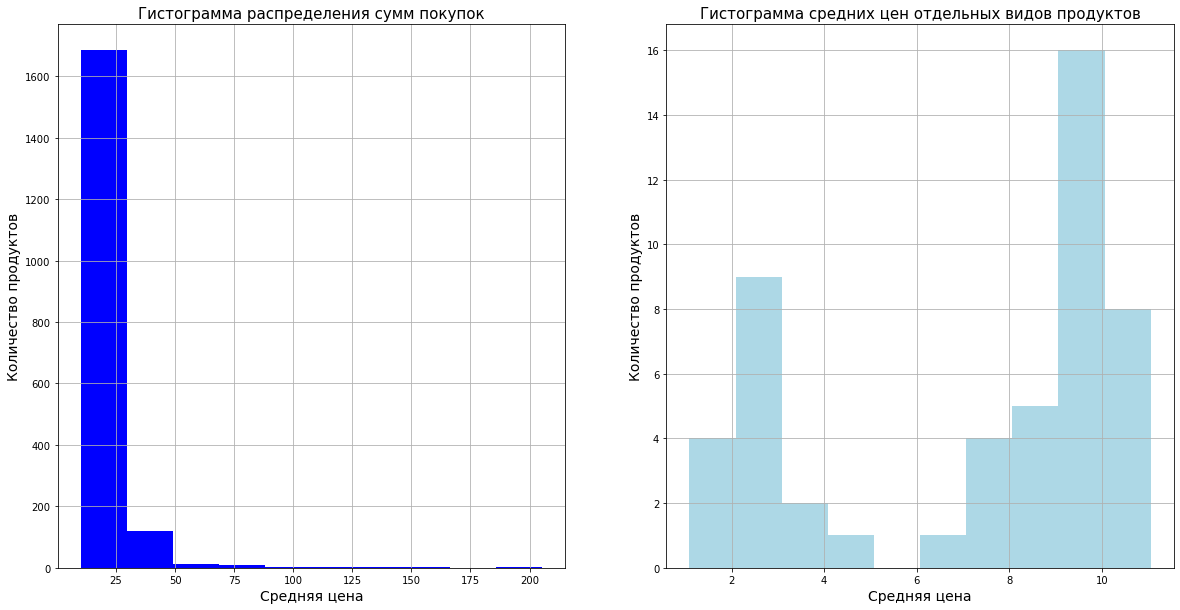

In [89]:
x_1 = df.groupby('order_id')['price_new'].sum()
x_2 = df.groupby('item_name')['price_for_one'].mean()

fig, ax = plt.subplots(1, 2, figsize=(20, 10))

ax[0].hist(x_1, color = 'blue')
ax[0].set_xlabel('Средняя цена', fontsize = 14)
ax[0].set_ylabel('Количество продуктов', fontsize = 14)
ax[0].set_title('Гистограмма распределения сумм покупок', fontsize = 15)
ax[0].grid()


ax[1].hist(x_2, color = 'lightblue')
ax[1].set_xlabel('Средняя цена', fontsize = 14)
ax[1].set_ylabel('Количество продуктов', fontsize = 14)
ax[1].set_title('Гистограмма средних цен отдельных видов продуктов', fontsize = 15)
ax[1].grid()

#### 2. [1 балл] Постройте график зависимости суммы покупок от дней.

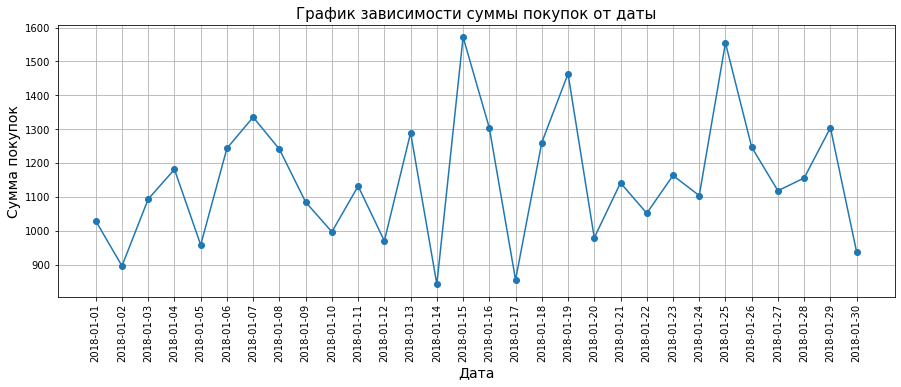

In [104]:
fig, ax = plt.subplots(figsize = (15, 5))

ax.plot(df.groupby(['date'])['price_new'].sum(), marker = 'o')
ax.set_xticks(np.arange(len(df.groupby('date'))))
ax.set_xticklabels(np.array(df.groupby('date').size().keys()), rotation = "vertical")
ax.set_xlabel('Датa', fontsize = 14)
ax.set_ylabel('Сумма покупок', fontsize = 14)
ax.set_title('График зависимости суммы покупок от даты', fontsize = 15)
ax.grid()

#### 3. [1 балл] Постройте средних сумм покупок по дням недели (bar plot).

Text(0.5, 1.0, 'Средние суммы покупок по дням недели')

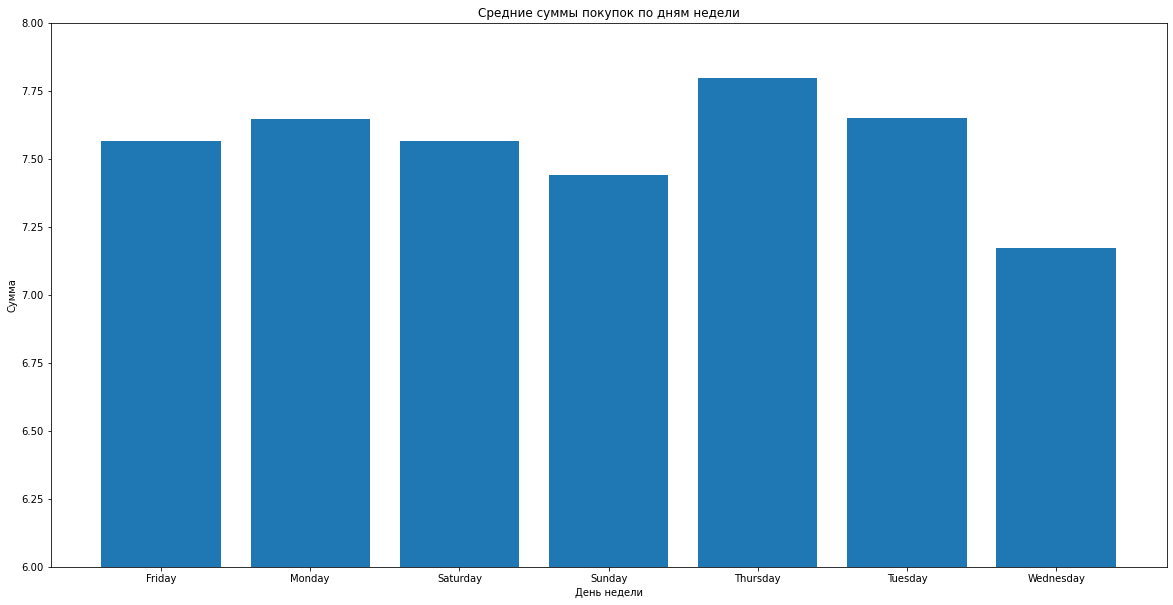

In [109]:
df.loc[0::7, 'day of the week'] = 'Monday'
df.loc[1::7, 'day of the week'] = 'Tuesday'
df.loc[2::7, 'day of the week'] = 'Wednesday'
df.loc[3::7, 'day of the week'] = 'Thursday'
df.loc[4::7, 'day of the week'] = 'Friday'
df.loc[5::7, 'day of the week'] = 'Saturday'
df.loc[6::7, 'day of the week'] = 'Sunday'
df3 = df.groupby(['day of the week', 'order_id'])['price_new'].sum().groupby('day of the week').mean()
df4 = df.groupby('day of the week').size().keys()
fig, ax = plt.subplots(figsize=(20,10))
ax.set_ylim([6,8])
ax.bar(df4, df3)
ax.set_xlabel("День недели")
ax.set_ylabel("Сумма")
ax.set_title('Средние суммы покупок по дням недели')

#### 4. [1 балл] Постройте график зависимости денег за товар от купленного количества (scatter plot).

In [118]:
Quantity = df['quantity']
Price = df['price_for_one']
Name = df['item_name']

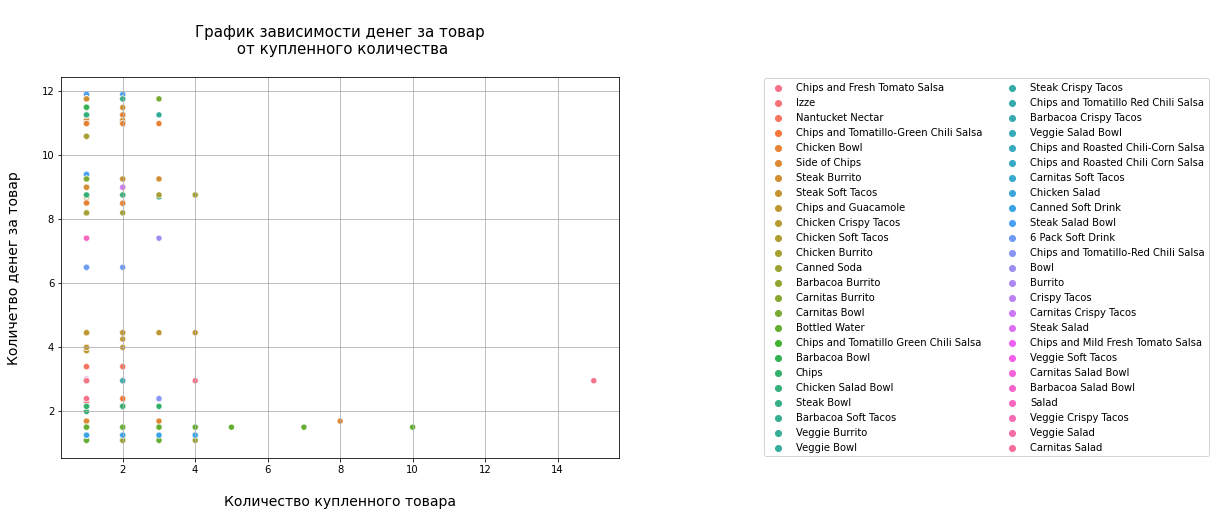

In [126]:
import seaborn
fig, ax = plt.subplots(figsize=(10, 7))
ax.set_title('\nГрафик зависимости денег за товар\n от купленного количества\n', fontsize = 15)

ax = seaborn.scatterplot(x = Quantity, y = Price, hue = Name)
ax.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=2)

ax.set_xlabel('\nКоличество купленного товара', fontsize = 14)
ax.set_ylabel('Количетво денег за товар\n', fontsize = 14)

ax.grid()


Сохраните график в формате pdf (так он останется векторизованным).

In [115]:
fig.savefig("grafik.pdf")

Еще одна билиотека для визуализации: [seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html). Это настройка над matplotlib, иногда удобнее и красивее делать визуализации через неё. 